In [2]:
pip install geojson

In [12]:
import numpy as np
import pandas as pd
import geojson
import matplotlib.pyplot as plt

In [4]:
with open("/content/data_mrkchhh.geojson") as f:
  gj=geojson.load(f)

In [18]:
gj

{"crs": {"properties": {"name": "urn:ogc:def:crs:OGC:1.3:CRS84"}, "type": "name"}, "features": [{"geometry": {"coordinates": [-8.039163, 31.668385], "type": "Point"}, "properties": {"id": 1}, "type": "Feature"}, {"geometry": {"coordinates": [-8.049036, 31.659218], "type": "Point"}, "properties": {"id": 2}, "type": "Feature"}, {"geometry": {"coordinates": [-8.05831, 31.665584], "type": "Point"}, "properties": {"id": 3}, "type": "Feature"}, {"geometry": {"coordinates": [-8.052925, 31.666093], "type": "Point"}, "properties": {"id": 4}, "type": "Feature"}, {"geometry": {"coordinates": [-8.04754, 31.663038], "type": "Point"}, "properties": {"id": 5}, "type": "Feature"}, {"geometry": {"coordinates": [-8.037667, 31.658709], "type": "Point"}, "properties": {"id": 6}, "type": "Feature"}, {"geometry": {"coordinates": [-8.031982, 31.651578], "type": "Point"}, "properties": {"id": 7}, "type": "Feature"}, {"geometry": {"coordinates": [-8.026896, 31.647503], "type": "Point"}, "properties": {"id": 8}

In [13]:
coordinates=[]

for features in gj['features']:
  coords=features['geometry']['coordinates']
  coordinates.append((coords[0], coords[1]))

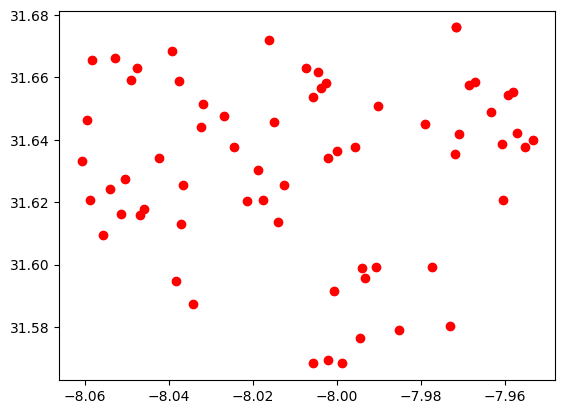

In [14]:
fig, ax=plt.subplots()
for coord in coordinates:
  ax.plot(coord[0], coord[1], 'ro')

In [16]:
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Location plot')

Text(0.5, 1.0, 'Location plot')

In [ ]:
#l'application de K-means

In [19]:
X=np.array((coordinates))

In [ ]:
max_clusetrs=10
inertias_values=[]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


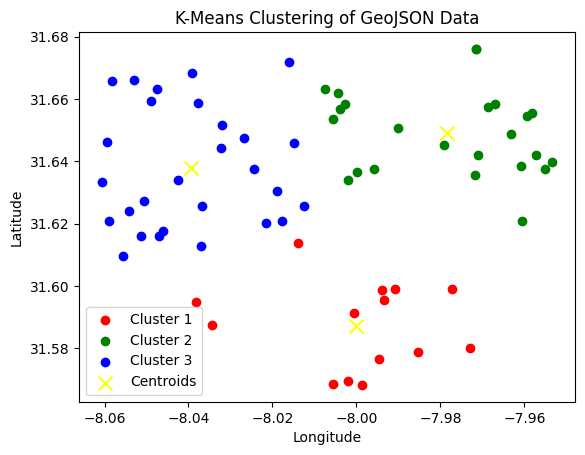

In [25]:

from sklearn.cluster import KMeans


# Convertir les coordonnées en un tableau numpy
coordinates_array = np.array(coordinates)

# Spécifier le nombre de clusters
num_clusters = 3

# Initialiser le modèle KMeans
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Ajuster le modèle à vos données
kmeans.fit(coordinates_array)

# Obtenir les centroids des clusters
centroids = kmeans.cluster_centers_

# Obtenir les labels des clusters assignés à chaque point
labels = kmeans.labels_

# Définir une liste de couleurs pour les clusters
colors = ['r', 'g', 'b', 'c', 'm']

# Créer une figure et un axe pour le graphique
fig, ax = plt.subplots()

# Tracer chaque point de données avec une couleur correspondant à son cluster
for i in range(num_clusters):
    points = coordinates_array[labels == i]
    ax.scatter(points[:, 0], points[:, 1], c=colors[i], label=f'Cluster {i+1}')

# Tracer les centroids des clusters
ax.scatter(centroids[:, 0], centroids[:, 1], marker='x', c='yellow', s=100, label='Centroids')

# Ajouter des étiquettes et un titre au graphique
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('K-Means Clustering of GeoJSON Data')
plt.legend()
plt.show()



ERROR: Operation cancelled by user


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

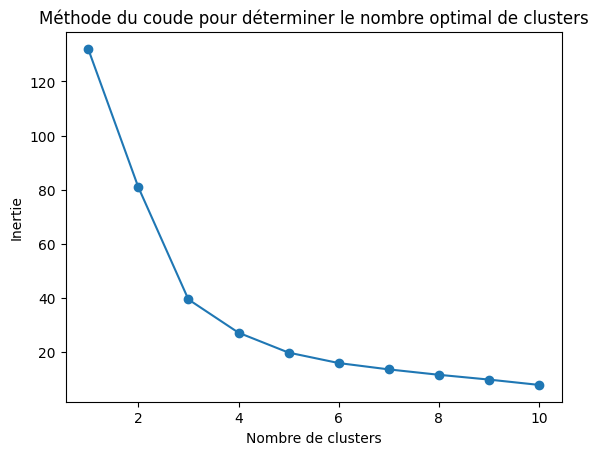

In [21]:
# Installer les dépendances si ce n'est pas déjà fait
!pip install geojson

import numpy as np
import pandas as pd
import geojson
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Charger le fichier GeoJSON
with open("/content/data_mrkchhh.geojson") as f:
  gj = geojson.load(f)

# Extraire les coordonnées des features
coordinates = []
for feature in gj['features']:
  coords = feature['geometry']['coordinates']
  coordinates.append((coords[0], coords[1]))

# Convertir les coordonnées en DataFrame
df = pd.DataFrame(coordinates, columns=['Longitude', 'Latitude'])

# Standardiser les données
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Calculer les inerties pour différentes valeurs de k
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertias.append(kmeans.inertia_)

# Tracer le graphique de l'inertie en fonction du nombre de clusters
plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel("Inertie")
plt.title("Méthode du coude pour déterminer le nombre optimal de clusters")
plt.show()

In [26]:
pip install folium

In [31]:
import numpy as np
from sklearn.cluster import KMeans
import folium
import geojson

# Charger le fichier GeoJSON
with open("/content/data_mrkchhh.geojson") as f:
  gj = geojson.load(f)

# Extraire les coordonnées des features
coordinates = []
for feature in gj['features']:
    coords = feature['geometry']['coordinates']
    coordinates.append((coords[1], coords[0]))  # Latitude, Longitude inversées pour Folium

# Convertir les coordonnées en un tableau numpy
coordinates_array = np.array(coordinates)

# Spécifier le nombre de clusters
num_clusters = 3

# Initialiser le modèle KMeans
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Ajuster le modèle à vos données
kmeans.fit(coordinates_array)

# Obtenir les centroids des clusters
centroids = kmeans.cluster_centers_

# Obtenir les labels des clusters assignés à chaque point
labels = kmeans.labels_

# Créer une carte Folium centrée sur une position moyenne
map_center = np.mean(coordinates_array, axis=0)
mymap = folium.Map(location=[map_center[0], map_center[1]], zoom_start=10)

# Définir une liste de couleurs pour les clusters
colors = ['red', 'green', 'blue']

# Tracer chaque point de données avec une couleur correspondant à son cluster
for i in range(num_clusters):
    points = coordinates_array[labels == i]
    for point in points:
        folium.CircleMarker(location=(point[0], point[1]), color=colors[i], radius=3).add_to(mymap)

# Tracer les centroids des clusters
for centroid in centroids:
    folium.Marker(location=(centroid[0], centroid[1]), icon=folium.Icon(color='black')).add_to(mymap)

# Afficher la carte
mymap


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
